In [16]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import r2_score
from datetime import datetime
import numpy as np

In [17]:
avocado = pd.read_csv('avocado.csv', index_col='Unnamed: 0')
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
avocado.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [19]:
avocado.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [20]:
avocado['Date'] = avocado['Date'].astype('datetime64')

In [21]:
totalVolumeCalifornia = avocado.loc[avocado['region']=='California',['Total Volume','year','Date']]
totalVolumeCaliforniaTrain = totalVolumeCalifornia.loc[totalVolumeCalifornia['year']!=2018,['Total Volume','Date','year']]
#totalVolumeCaliforniaTrain = totalVolumeCaliforniaTrain.loc[totalVolumeCaliforniaTrain['year']!=2015,['Total Volume','year','Date']]
#totalVolumeCaliforniaTrain2015 = totalVolumeCaliforniaTrain2016.loc[totalVolumeCaliforniaTrain2016['year']==2015,['Total Volume','year','Date']]
#totalVolumeCaliforniaTrain2016 = totalVolumeCaliforniaTrain2016.loc[totalVolumeCaliforniaTrain2016['year']==2016,['Total Volume','year','Date']]
#totalVolumeCaliforniaTrain2017 = totalVolumeCaliforniaTrain.loc[totalVolumeCaliforniaTrain['year']!=2016,['Total Volume','year','Date']]
#totalVolumeCaliforniaTrain2017 = totalVolumeCaliforniaTrain2017.loc[totalVolumeCaliforniaTrain2017['year']==2015,['Total Volume','year','Date']]
totalVolumeCaliforniaTrain

,Total Volume,Date,year
0,5040365.47,2015-12-27,2015
1,4695737.21,2015-12-20,2015
2,5259354.30,2015-12-13,2015
3,5775536.27,2015-12-06,2015
4,4575710.62,2015-11-29,2015
...,...,...,...
48,165225.54,2017-01-29,2017
49,136422.97,2017-01-22,2017
50,142739.21,2017-01-15,2017
51,177777.40,2017-01-08,2017


In [22]:
totalVolumeCaliforniaTest = totalVolumeCalifornia.loc[totalVolumeCalifornia['year']==2018,['Date','Total Volume']]
#totalVolumeCaliforniaTest.loc[:, 'Total Volume']= np.log(totalVolumeCaliforniaTest.loc[:, 'Total Volume']) 
totalVolumeCaliforniaTest

,Date,Total Volume
0,2018-03-25,6687009.44
1,2018-03-18,6802084.11
2,2018-03-11,6488605.43
3,2018-03-04,6295529.61
4,2018-02-25,6750361.46
5,2018-02-18,6379219.83
6,2018-02-11,6718358.10
7,2018-02-04,10894677.77
8,2018-01-28,6134040.58
9,2018-01-21,6610010.64


In [23]:
totalVolumeCaliforniaTrain = totalVolumeCaliforniaTrain.rename(columns={'Total Volume':'y', 'Date':'ds' })
#totalVolumeCaliforniaTrain.loc[:, 'y']= np.log(totalVolumeCaliforniaTrain.loc[:, 'y']) 
totalVolumeCaliforniaTrain

,y,ds,year
0,5040365.47,2015-12-27,2015
1,4695737.21,2015-12-20,2015
2,5259354.30,2015-12-13,2015
3,5775536.27,2015-12-06,2015
4,4575710.62,2015-11-29,2015
...,...,...,...
48,165225.54,2017-01-29,2017
49,136422.97,2017-01-22,2017
50,142739.21,2017-01-15,2017
51,177777.40,2017-01-08,2017


In [24]:
model = Prophet()
model.fit(totalVolumeCaliforniaTrain)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,2.820237e+06,-716933.864828,6.600187e+06,2.820237e+06,2.820237e+06,180349.053188,180349.053188,180349.053188,180349.053188,180349.053188,180349.053188,0.0,0.0,0.0,3.000586e+06
1,2015-01-11,2.822277e+06,-624042.413581,6.767508e+06,2.822277e+06,2.822277e+06,236903.328497,236903.328497,236903.328497,236903.328497,236903.328497,236903.328497,0.0,0.0,0.0,3.059181e+06
2,2015-01-18,2.824317e+06,-702243.888125,6.912466e+06,2.824317e+06,2.824317e+06,395308.748711,395308.748711,395308.748711,395308.748711,395308.748711,395308.748711,0.0,0.0,0.0,3.219626e+06
3,2015-01-25,2.826358e+06,-260026.136533,7.306680e+06,2.826358e+06,2.826358e+06,693200.665170,693200.665170,693200.665170,693200.665170,693200.665170,693200.665170,0.0,0.0,0.0,3.519558e+06
4,2015-02-01,2.828398e+06,300655.115533,7.639161e+06,2.828398e+06,2.828398e+06,981533.170871,981533.170871,981533.170871,981533.170871,981533.170871,981533.170871,0.0,0.0,0.0,3.809931e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2018-12-27,3.243644e+06,-338671.283857,6.970992e+06,3.243641e+06,3.243646e+06,70547.867895,70547.867895,70547.867895,70547.867895,70547.867895,70547.867895,0.0,0.0,0.0,3.314192e+06
518,2018-12-28,3.243935e+06,-751221.305768,6.698302e+06,3.243933e+06,3.243937e+06,91512.661516,91512.661516,91512.661516,91512.661516,91512.661516,91512.661516,0.0,0.0,0.0,3.335448e+06
519,2018-12-29,3.244226e+06,-514304.429231,7.212009e+06,3.244224e+06,3.244229e+06,110194.445918,110194.445918,110194.445918,110194.445918,110194.445918,110194.445918,0.0,0.0,0.0,3.354421e+06
520,2018-12-30,3.244518e+06,-252035.205084,7.216670e+06,3.244516e+06,3.244520e+06,126620.110196,126620.110196,126620.110196,126620.110196,126620.110196,126620.110196,0.0,0.0,0.0,3.371138e+06


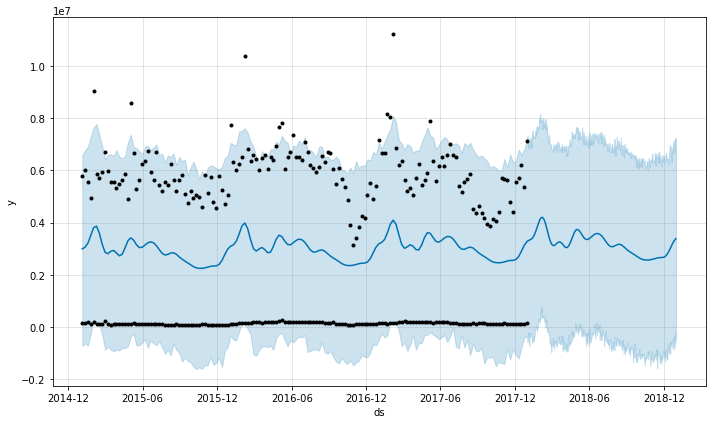

In [26]:
fig1 = model.plot(forecast)

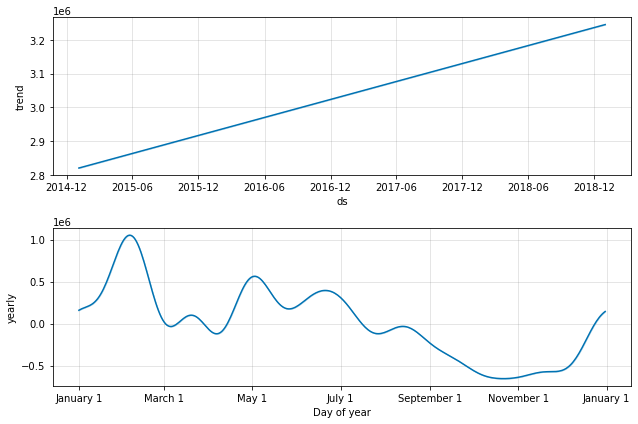

In [27]:
fig2 = model.plot_components(forecast)

In [28]:
forecast= forecast.loc[:,['ds','yhat','yhat_lower','yhat_upper']]
forecast.rename(columns={'ds':'Date'}, inplace=True) 
forecast.loc[:,'yhat_middle'] = (forecast.loc[:,'yhat_upper'] + forecast.loc[:,'yhat_lower'])/2
metrics = totalVolumeCaliforniaTest.merge(forecast,how='left')
metrics

,Date,Total Volume,yhat,yhat_lower,yhat_upper,yhat_middle
0,2018-03-25,6687009.44,3.224095e+06,-317468.751385,6.778924e+06,3.230728e+06
1,2018-03-18,6802084.11,3.255564e+06,-583626.278365,7.045752e+06,3.231063e+06
2,2018-03-11,6488605.43,3.167939e+06,-564017.103129,6.823179e+06,3.129581e+06
3,2018-03-04,6295529.61,3.129763e+06,-415406.741360,6.785737e+06,3.185165e+06
4,2018-02-25,6750361.46,3.321746e+06,-557963.517240,6.998676e+06,3.220356e+06
5,2018-02-18,6379219.83,3.722502e+06,-190089.742132,7.456863e+06,3.633387e+06
6,2018-02-11,6718358.10,4.094662e+06,198669.546633,7.775758e+06,3.987214e+06
7,2018-02-04,10894677.77,4.194402e+06,761430.336929,7.943151e+06,4.352291e+06
8,2018-01-28,6134040.58,3.989334e+06,328896.036260,7.605562e+06,3.967229e+06
9,2018-01-21,6610010.64,3.665771e+06,-12057.303955,7.315948e+06,3.651945e+06


In [29]:
r2_score(metrics['Total Volume'], metrics['yhat'])

0.0087707394900981

In [30]:
#0.010858278693953505 2015 2018